# Part2

In [1]:
# Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Import Dataset
con = sqlite3.connect("northwind.sqlite")

**The most active place for employee is Eastern and Northern compared to Western and Southern**

* ***Some basic information provided by data base, evaluating the the whole work they have done in the past years***<br>
**We want to know sales for each employee and see how they perform in total sales**

In [2]:
Draft2_1 = """
        SELECT O.OrderID, O.CustomerID, O.EmployeeID, E.LastName, E.FirstName, E.Title, E.City, E.Region FROM Orders as O
        LEFT JOIN Employees as E ON O.EmployeeID = E.EmployeeID
       """
Draft2_1 = pd.read_sql(Draft2_1,con)
Draft2_2 = pd.merge(
        left = Draft2_1,
        right = pd.read_sql("SELECT * FROM 'Summary of Sales by Year' ",con),
        how = "left",
        on = "OrderID"
        )
Draft2_3 = Draft2_2.drop(["OrderID"],axis = 1).groupby("EmployeeID").sum().sort_values(by = "Subtotal")
Draft2_3.insert(0, "EmployeeName", ['Buchanan,Steven','Suyama,Michael','Dodsworth,Anne','King,Robert','Callahan,Laura','Fuller,Andrew','Davolio,Nancy','Leverling,Janet','Peacock,Margaret'])
Draft2_3

,EmployeeName,Subtotal
EmployeeID,,
5,"Buchanan,Steven",68792.2825
6,"Suyama,Michael",72527.6295
9,"Dodsworth,Anne",76450.0665
7,"King,Robert",119619.2500
8,"Callahan,Laura",123842.6775
2,"Fuller,Andrew",162769.7800
1,"Davolio,Nancy",187277.3840
3,"Leverling,Janet",202812.8430
4,"Peacock,Margaret",225763.6960


In [3]:
print(sum(Draft2_3.Subtotal),Draft2_3.Subtotal.mean())

1239855.609 137761.73433333333


**In this section, I combine total sales of years table with the combination of orders table and Employee table to get a summary for each employees sales. According to the result table, we can see that the best salesman is Peacock Margaret and the worst salesman is Buchanan Steven. Besides, the total sale for 1996 and 1998 is 1239855 and mean of the sale is 137761**

In [4]:
# Create Query Used for Analysis
query1 = """
    SELECT e.EmployeeID, o.OrderID, e.LastName, e.FirstName, e.Title, od.UnitPrice, od.Quantity, od.Discount, p.ProductName, o.OrderDate, ((od.UnitPrice-od.Discount)*od.Quantity) as 'TotalSold', o.ShipCountry, c.CategoryName
    FROM 'Orders' as o
    INNER JOIN 'Order Details' as od ON o.OrderID = od.OrderID
    INNER JOIN 'Products' as p ON od.ProductID = p.ProductID
    INNER JOIN 'Categories' as c ON p.CategoryID = c.CategoryID
    INNER JOIN 'Employees' as e ON o.EmployeeID = e.EmployeeID
    """
emp = pd.read_sql(query1, con)
emp

,EmployeeID,OrderID,LastName,FirstName,Title,UnitPrice,Quantity,Discount,ProductName,OrderDate,TotalSold,ShipCountry,CategoryName
0,5,10248,Buchanan,Steven,Sales Manager,14.00,12,0.00,Queso Cabrales,1996-07-04 00:00:00.000,168.00,France,Dairy Products
1,5,10248,Buchanan,Steven,Sales Manager,9.80,10,0.00,Singaporean Hokkien Fried Mee,1996-07-04 00:00:00.000,98.00,France,Grains/Cereals
2,5,10248,Buchanan,Steven,Sales Manager,34.80,5,0.00,Mozzarella di Giovanni,1996-07-04 00:00:00.000,174.00,France,Dairy Products
3,6,10249,Suyama,Michael,Sales Representative,18.60,9,0.00,Tofu,1996-07-05 00:00:00.000,167.40,Germany,Produce
4,6,10249,Suyama,Michael,Sales Representative,42.40,40,0.00,Manjimup Dried Apples,1996-07-05 00:00:00.000,1696.00,Germany,Produce
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,1,11077,Davolio,Nancy,Sales Representative,33.25,2,0.03,Wimmers gute SemmelknÃ¶del,1998-05-06 00:00:00.000,66.44,USA,Grains/Cereals
2151,1,11077,Davolio,Nancy,Sales Representative,17.00,1,0.00,Louisiana Hot Spiced Okra,1998-05-06 00:00:00.000,17.00,USA,Condiments
2152,1,11077,Davolio,Nancy,Sales Representative,15.00,2,0.01,RÃ¶d Kaviar,1998-05-06 00:00:00.000,29.98,USA,Seafood
2153,1,11077,Davolio,Nancy,Sales Representative,7.75,4,0.00,RhÃ¶nbrÃ¤u Klosterbier,1998-05-06 00:00:00.000,31.00,USA,Beverages


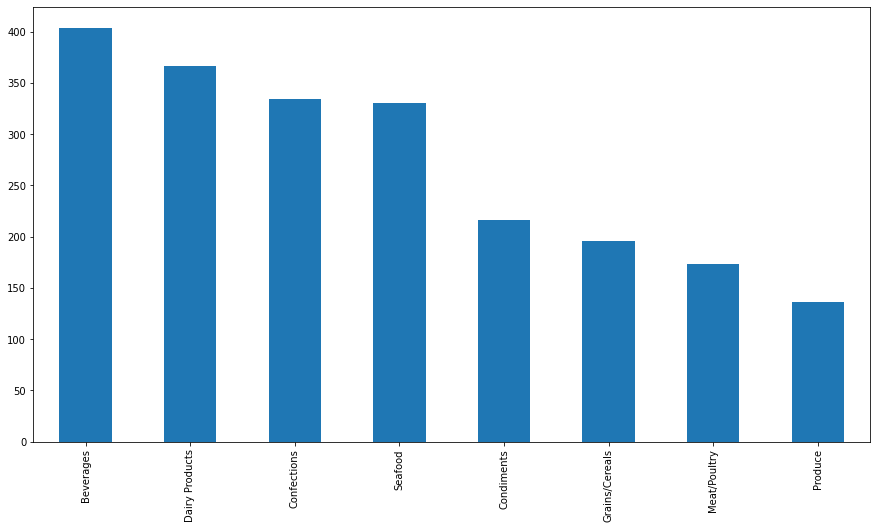

In [5]:
table = emp.CategoryName.value_counts()
table.plot.bar(figsize=(15, 8))
plt.xticks(rotation = 90)
plt.show()

**Bar plot above shows order numbers for each kinds of products, we found that the Beverages is the most popular products that they sold evaluated in order numbers whereas produce is the least one.**

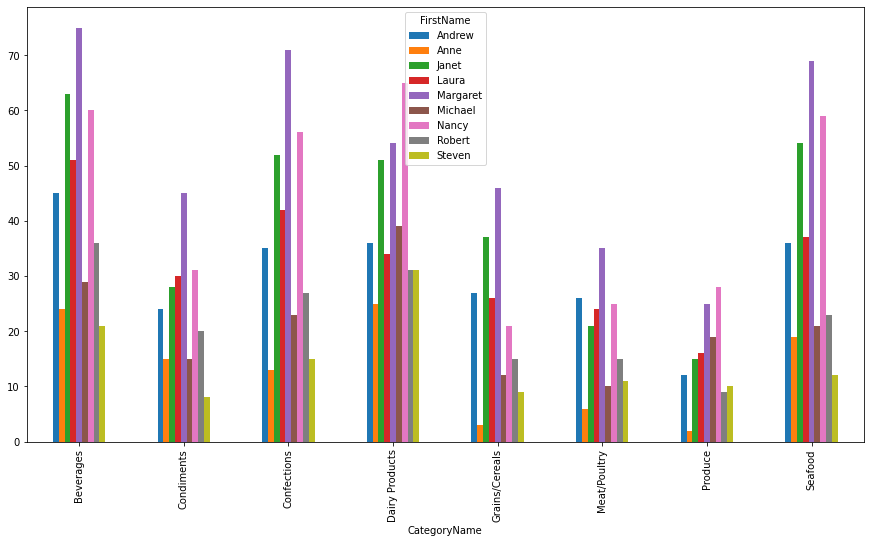

In [6]:
table = pd.crosstab(emp.CategoryName,emp.FirstName)
table.plot.bar(figsize=(15, 8))
plt.xticks(rotation = 90)
plt.show()

Bar plot above is the 

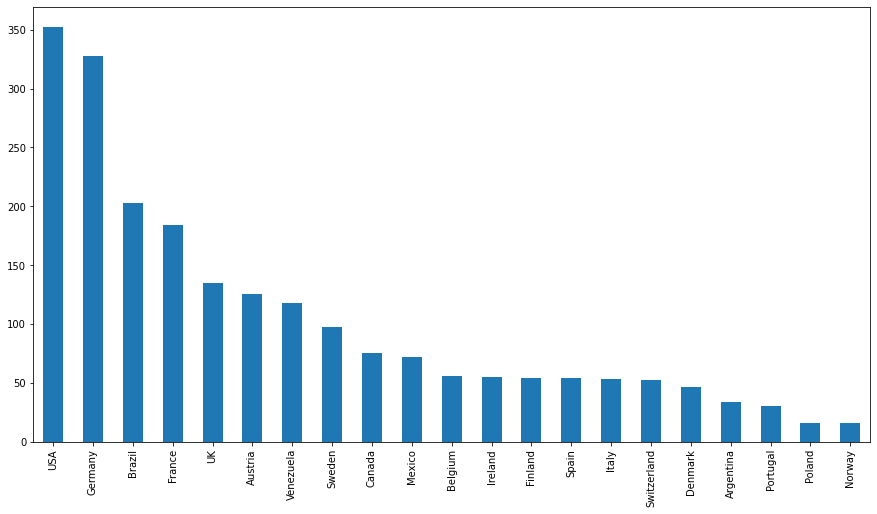

In [7]:
table = emp.ShipCountry.value_counts()
table.plot.bar(figsize=(15, 8))
plt.xticks(rotation = 90)
plt.show()

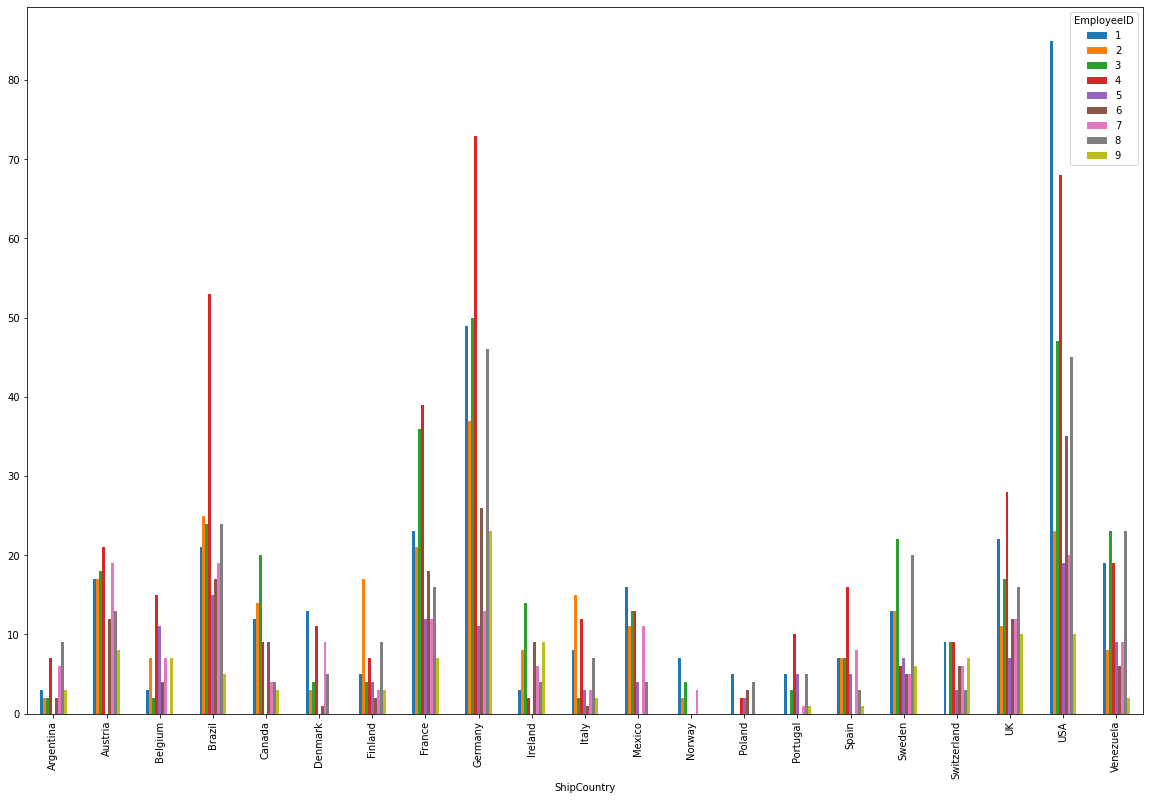

In [8]:
table = pd.crosstab(emp.ShipCountry,emp.EmployeeID)
table.plot.bar(figsize=(20, 13))
plt.xticks(rotation = 90)
plt.show()

In [15]:
# Clean Dataset
emp['OrderDate'] = pd.DatetimeIndex(emp['OrderDate']).year
emp['EmployeeName'] = emp["FirstName"] + " " + emp["LastName"]
emp[["Title","LastName","EmployeeID","OrderID","FirstName","ProductName","OrderDate"]] = emp[["Title","LastName","EmployeeID","OrderID","FirstName","ProductName","OrderDate"]].apply(lambda x: x.astype("category"))
emp

,EmployeeID,OrderID,LastName,FirstName,Title,UnitPrice,Quantity,Discount,ProductName,OrderDate,TotalSold,ShipCountry,CategoryName,EmployeeName
0,5,10248,Buchanan,Steven,Sales Manager,14.00,12,0.00,Queso Cabrales,1996,168.00,France,Dairy Products,Steven Buchanan
1,5,10248,Buchanan,Steven,Sales Manager,9.80,10,0.00,Singaporean Hokkien Fried Mee,1996,98.00,France,Grains/Cereals,Steven Buchanan
2,5,10248,Buchanan,Steven,Sales Manager,34.80,5,0.00,Mozzarella di Giovanni,1996,174.00,France,Dairy Products,Steven Buchanan
3,6,10249,Suyama,Michael,Sales Representative,18.60,9,0.00,Tofu,1996,167.40,Germany,Produce,Michael Suyama
4,6,10249,Suyama,Michael,Sales Representative,42.40,40,0.00,Manjimup Dried Apples,1996,1696.00,Germany,Produce,Michael Suyama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,1,11077,Davolio,Nancy,Sales Representative,33.25,2,0.03,Wimmers gute SemmelknÃ¶del,1998,66.44,USA,Grains/Cereals,Nancy Davolio
2151,1,11077,Davolio,Nancy,Sales Representative,17.00,1,0.00,Louisiana Hot Spiced Okra,1998,17.00,USA,Condiments,Nancy Davolio
2152,1,11077,Davolio,Nancy,Sales Representative,15.00,2,0.01,RÃ¶d Kaviar,1998,29.98,USA,Seafood,Nancy Davolio
2153,1,11077,Davolio,Nancy,Sales Representative,7.75,4,0.00,RhÃ¶nbrÃ¤u Klosterbier,1998,31.00,USA,Beverages,Nancy Davolio


In [16]:
# Sort Table to find top 3 and worst 3 sold Products for an employee
emp_sort = emp[(emp["EmployeeID"] == 5)].groupby("ProductName")[["TotalSold"]].sum()
emp_sort.sort_values(by=['TotalSold'])

# Create Top 3 Products sold
bottom_3 = emp_sort.sort_values(by=['TotalSold']).iloc[:3]
bottom_3

# Create Top 3 Products sold
Top_3 = emp_sort.sort_values(by=['TotalSold']).iloc[-3:]
Top_3

,TotalSold
ProductName,
Mozzarella di Giovanni,5813.7
Raclette Courdavault,7913.9
CÃ´te de Blaye,8422.0


In [17]:
# Total discounts offered by employee
emp_total_discount = emp.groupby(["EmployeeName"])[["Discount"]].sum()
emp_total_discount

,Discount
EmployeeName,
Andrew Fuller,10.55
Anne Dodsworth,7.30
Janet Leverling,15.95
Laura Callahan,14.60
Margaret Peacock,25.75
Michael Suyama,9.15
Nancy Davolio,16.99
Robert King,12.95
Steven Buchanan,7.80


In [18]:
# How much each employee sold Total by year
emp_total_sold = emp.groupby(["EmployeeName","OrderDate"],as_index=False)[["TotalSold"]].sum()
emp_total_sold

,EmployeeName,OrderDate,TotalSold
0,Andrew Fuller,1996,22774.50
1,Andrew Fuller,1997,74804.20
2,Andrew Fuller,1998,79799.96
3,Anne Dodsworth,1996,11295.05
4,Anne Dodsworth,1997,29473.95
5,Anne Dodsworth,1998,41971.15
6,Janet Leverling,1996,19192.50
7,Janet Leverling,1997,111608.01
8,Janet Leverling,1998,81835.84
9,Laura Callahan,1996,23130.10


In [19]:
plotdata = pd.DataFrame({

    "1996":[22774.50,11295.05,19192.50,23130.10,52978.15,17674.50,38649.85,18063.55,21893.30],

    "1997":[11295.05,29473.95,111608.01,59592.72,139067.20,45869.00,97330.18,66514.44,32493.15],

    "1998":[79799.96,41971.15,81835.84,50280.81,57435.45,14456.65,65687.67,56306.50,20958.25]},

    index=["Andrew Fuller", "Anne Dodsworth", "Janet Leverling", "Laura Callahan","Margaret Peacock","Michael Suyama","Nancy Davolio","Robert King","Steven Buchanan	"])

Text(0, 0.5, 'Sales')

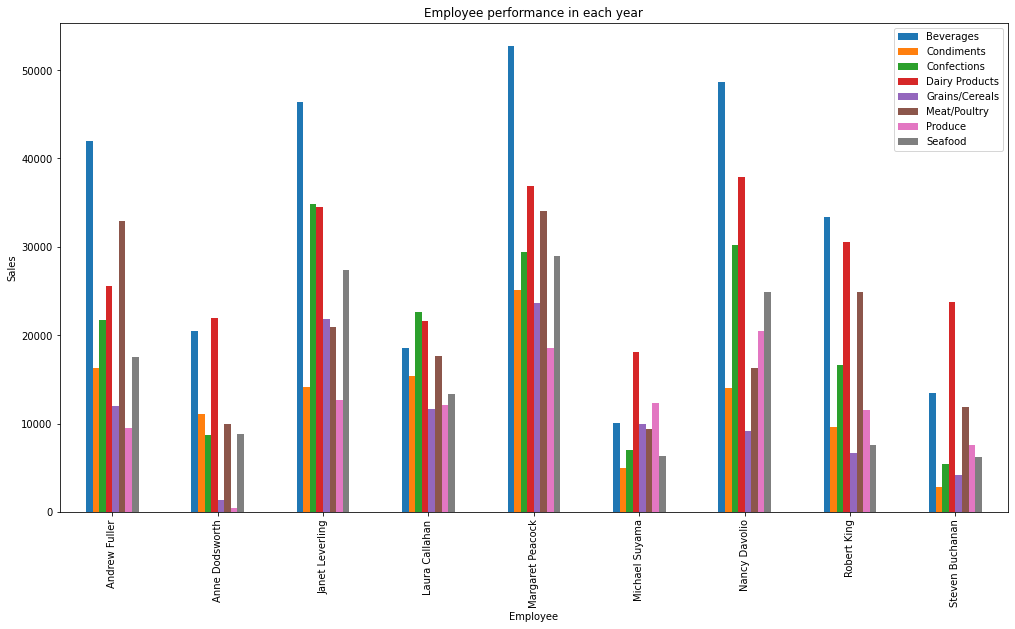

In [25]:
plotdata.plot(kind="bar",figsize=(17, 9))

plt.title("Employee performance in each year")

plt.xlabel("Employee")

plt.ylabel("Sales")

In [26]:
# How much each employee sold Total by year
emp_total_sold = emp.groupby(["EmployeeName","CategoryName"],as_index=False)[["TotalSold"]].sum()
emp_total_sold

,EmployeeName,CategoryName,TotalSold
0,Andrew Fuller,Beverages,41964.75
1,Andrew Fuller,Condiments,16296.55
2,Andrew Fuller,Confections,21682.45
3,Andrew Fuller,Dairy Products,25532.55
4,Andrew Fuller,Grains/Cereals,12019.60
...,...,...,...
67,Steven Buchanan,Dairy Products,23770.45
68,Steven Buchanan,Grains/Cereals,4227.50
69,Steven Buchanan,Meat/Poultry,11857.15
70,Steven Buchanan,Produce,7595.20


In [27]:
emp_total_sold.CategoryName.unique()

array(['Beverages', 'Condiments', 'Confections', 'Dairy Products',
       'Grains/Cereals', 'Meat/Poultry', 'Produce', 'Seafood'],
      dtype=object)

## Xudong added 

In [23]:
plotdata = pd.DataFrame({

    "Beverages":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Beverages" )].TotalSold),

    "Condiments":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Condiments" )].TotalSold),

    "Confections":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Confections" )].TotalSold),
    
    "Dairy Products":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Dairy Products" )].TotalSold),
    
    "Grains/Cereals":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Grains/Cereals" )].TotalSold),
    
    "Meat/Poultry":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Meat/Poultry" )].TotalSold),
    
    "Produce":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Produce" )].TotalSold),
    
    "Seafood":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Seafood" )].TotalSold)},

    index=["Andrew Fuller", "Anne Dodsworth", "Janet Leverling", "Laura Callahan","Margaret Peacock","Michael Suyama","Nancy Davolio","Robert King","Steven Buchanan"])

Text(0, 0.5, 'Sales')

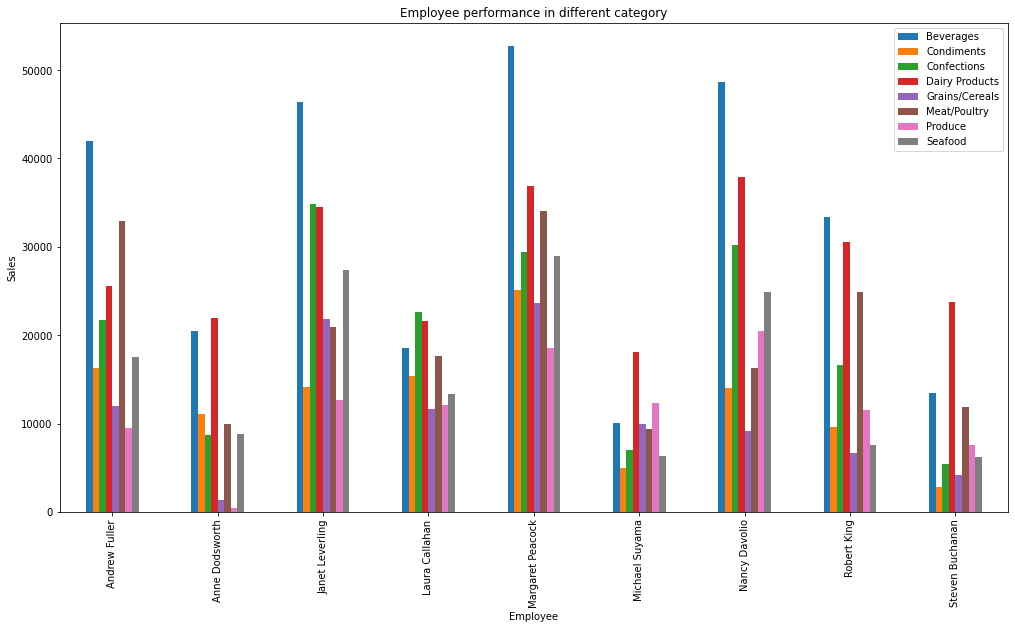

In [24]:
plotdata.plot(kind="bar",figsize=(17, 9))

plt.title("Employee performance in different category")

plt.xlabel("Employee")

plt.ylabel("Sales")

In [54]:
emp_total_sold = emp.groupby(["Title","OrderDate"],as_index=False)[["TotalSold"]].sum()
emp_total_sold

,Title,OrderDate,TotalSold
0,Inside Sales Coordinator,1996,23130.10
1,Inside Sales Coordinator,1997,59592.72
2,Inside Sales Coordinator,1998,50280.81
3,Sales Manager,1996,21893.30
4,Sales Manager,1997,32493.15
5,Sales Manager,1998,20958.25
6,Sales Representative,1996,157853.60
7,Sales Representative,1997,489862.78
8,Sales Representative,1998,317693.26
9,"Vice President, Sales",1996,22774.50


In [55]:
plotdata = pd.DataFrame({

    "1996":list(emp_total_sold[(emp_total_sold["OrderDate"] == 1996 )].TotalSold),

    "1997":list(emp_total_sold[(emp_total_sold["OrderDate"] == 1997 )].TotalSold),

    "1998":list(emp_total_sold[(emp_total_sold["OrderDate"] == 1998 )].TotalSold),
    },

    index=list(emp_total_sold.Title.unique()))

Text(0, 0.5, 'Sales')

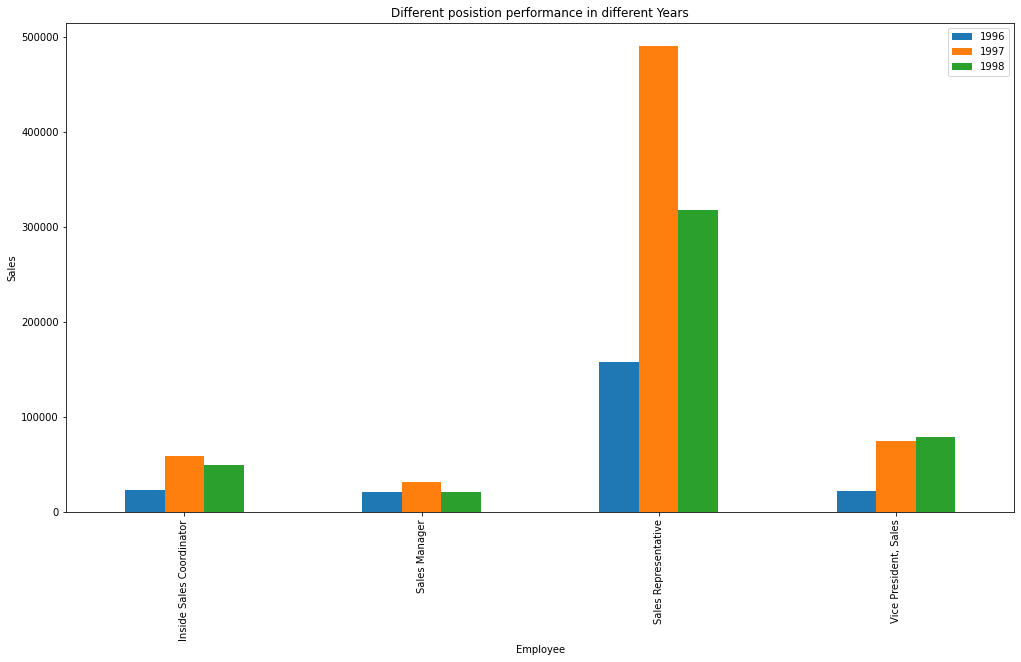

In [56]:
plotdata.plot(kind="bar",figsize=(17, 9))

plt.title("Different posistion performance in different Years")

plt.xlabel("Employee")

plt.ylabel("Sales")

In [57]:
emp_total_sold = emp.groupby(["Title","CategoryName"],as_index=False)[["TotalSold"]].sum()
emp_total_sold

,Title,CategoryName,TotalSold
0,Inside Sales Coordinator,Beverages,18590.60
1,Inside Sales Coordinator,Condiments,15414.50
2,Inside Sales Coordinator,Confections,22590.65
3,Inside Sales Coordinator,Dairy Products,21579.40
4,Inside Sales Coordinator,Grains/Cereals,11680.40
5,Inside Sales Coordinator,Meat/Poultry,17617.45
6,Inside Sales Coordinator,Produce,12141.95
7,Inside Sales Coordinator,Seafood,13388.68
8,Sales Manager,Beverages,13479.30
9,Sales Manager,Condiments,2795.70


In [58]:
plotdata = pd.DataFrame({

    "Beverages":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Beverages" )].TotalSold),

    "Condiments":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Condiments" )].TotalSold),

    "Confections":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Confections" )].TotalSold),
    
    "Dairy Products":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Dairy Products" )].TotalSold),
    
    "Grains/Cereals":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Grains/Cereals" )].TotalSold),
    
    "Meat/Poultry":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Meat/Poultry" )].TotalSold),
    
    "Produce":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Produce" )].TotalSold),
    
    "Seafood":list(emp_total_sold[(emp_total_sold["CategoryName"] == "Seafood" )].TotalSold)},

    index=list(emp_total_sold.Title.unique()))

Text(0, 0.5, 'Sales')

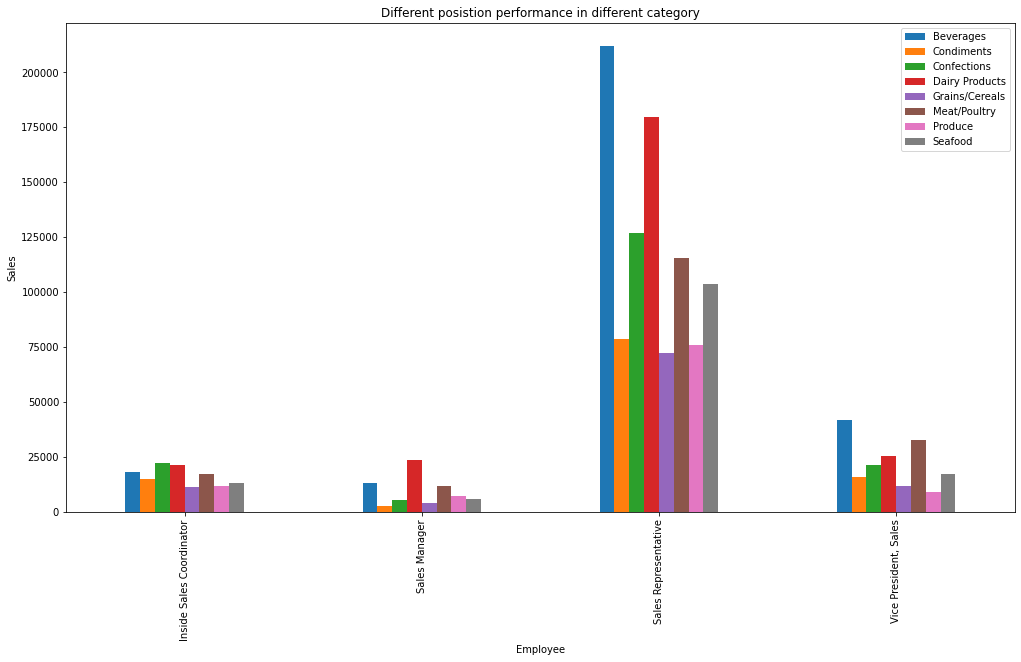

In [59]:
plotdata.plot(kind="bar",figsize=(17, 9))

plt.title("Different posistion performance in different category")

plt.xlabel("Employee")

plt.ylabel("Sales")

In [ ]:
# Line chart 1: Plot the Total Sales of each employee over time

emp_total_sold.pivot_table(values="TotalSold", index = "OrderDate", columns = "EmployeeName").plot()
plt.ylabel(" Total Revenue (in XXX)")
plt.title("Total Sales of each employee over time")
plt.legend(loc = "lower center", bbox_to_anchor = (0.5, -0.5))

In [68]:
#Allows iteration of employees
empOned = emp[(emp["EmployeeID"] == 5)]
emp_0_sold = empOned.groupby("ProductName")[["TotalSold"]].sum()
emp_0_sold.loc[emp_0_sold.TotalSold == 0]

,TotalSold
ProductName,
Aniseed Syrup,0.0
Carnarvon Tigers,0.0
Chef Anton's Gumbo Mix,0.0
Chocolade,0.0
Filo Mix,0.0
Genen Shouyu,0.0
Grandma's Boysenberry Spread,0.0
Gravad lax,0.0
GumbÃ¤r GummibÃ¤rchen,0.0


EXAMPLE:

For Employee ID #5, or Steven Buchanan

# Part3

In [2]:
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [3]:
pdf = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
psdf = ps.from_pandas(pdf)

In [4]:
Mean = []
Std = []
Name = []
for i in list(psdf.columns):
    if i in ['AQ1','AQ2','AQ3','AQ4','AFinal','HQ1','HQ2','HQ3','HQ4','HFinal']:
        Mean.append(psdf[i].mean())
        Std.append(psdf[i].std())
        Name.append(str(i))
    else:
        continue

In [5]:
Mean_psdf = pd.DataFrame(zip(Name,Mean,Std),columns = ["Variable","Mean","Std"])
Mean_psdf

,Variable,Mean,Std
0,AQ1,3.924806,4.490700
1,AQ2,6.241429,5.221593
2,AQ3,4.386920,4.632717
3,AQ4,5.890233,5.278775
4,AFinal,20.557188,10.195586
5,HQ1,4.828868,4.726903
6,HQ2,7.105157,5.702788
7,HQ3,4.791126,4.755145
8,HQ4,6.322962,5.417310
9,HFinal,23.174013,10.405952


In [6]:
meanps = psdf.groupby("season").mean()
meanps = meanps[['AQ1', 'AQ2', 'AQ3',
'AQ4', 'AFinal', 'HQ1', 'HQ2', 'HQ3', 'HQ4', 'HFinal']]
meanps

,AQ1,AQ2,AQ3,AQ4,AFinal,HQ1,HQ2,HQ3,HQ4,HFinal
season,,,,,,,,,,
2002,4.037453,6.022472,4.449438,5.928839,20.640449,4.307116,7.411985,4.715356,6.426966,23.018727
2003,3.558052,6.093633,3.913858,5.355805,19.112360,5.026217,6.625468,4.561798,6.295880,22.677903
2004,3.913858,6.265918,4.153558,5.797753,20.239700,4.943820,7.071161,4.250936,6.561798,22.906367
2005,3.887640,5.543071,4.029963,5.191011,18.786517,4.393258,7.426966,4.677903,5.737828,22.314607
2006,3.629213,6.179775,4.303371,6.063670,20.254682,4.606742,6.041199,4.565543,5.932584,21.258427
2007,3.696629,6.220974,4.337079,5.872659,20.228464,5.026217,7.074906,4.913858,6.018727,23.157303
2008,3.801498,6.498127,4.074906,6.423221,20.842697,5.179775,7.205993,4.595506,6.044944,23.183521
2009,3.868914,6.202247,4.299625,5.943820,20.382022,4.737828,7.790262,4.228464,5.887640,22.779026
2010,3.973783,6.865169,4.629213,5.704120,21.318352,4.576779,6.771536,4.868914,6.681648,23.000000


In [8]:
one = meanps.to_pandas()
one

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pyspark\pandas\utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


pandas.core.frame.DataFrame

Text(0, 0.5, 'Mean')

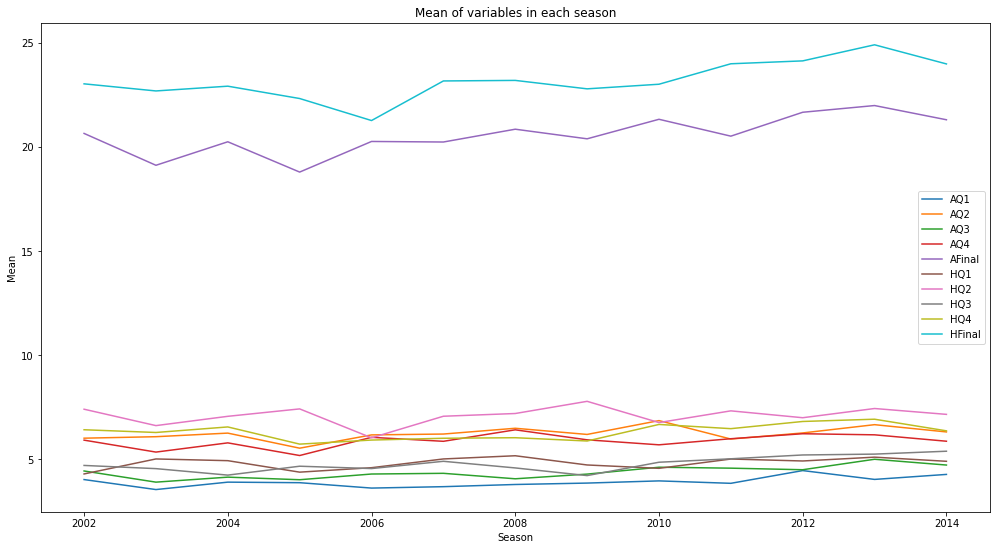

In [10]:
one.plot(figsize=(17, 9))

plt.title("Mean of variables in each season")

plt.xlabel("Season")

plt.ylabel("Mean")